In [37]:
import math
import pickle
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import r2_score

In [38]:
# Read the file in which the values are saved
appa2 = pd.read_csv("../../exports/appa2.csv")
appa2 = appa2.drop('Unnamed: 0', axis=1)

# Random Forest

In [39]:
# Select the features
cols = [
    'LaFeO3_1', 'LaFeO3_2', 
    'STN_1', 'STN_2', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
    'STN_1_heatR', 'STN_2_heatR', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'STN_1_heatV', 'STN_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age',
    'STN_1_Age', 'STN_2_Age', 
    'sin_hour', 'cos_hour', 
    'sin_weekday', 'cos_weekday', 
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate',
    'year', 
    'UV', 'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 
]

# Select the target
outs = ['PM10', 'CO', 'NO2']

In [40]:
# Split the values in training and test
vsplit = round(len(appa2) * 0.2)

X_train = appa2.iloc[vsplit:][cols]
X_test = appa2.iloc[:vsplit][cols]

Y_train = appa2.iloc[vsplit:][outs]
Y_test = appa2.iloc[:vsplit][outs]

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 1600 - 500, stop= 1600 + 500, num=10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5 ,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2 ,3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1100, 1211, 1322, 1433, 1544, 1655, 1766, 1877, 1988, 2100], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [42]:
# Choose the type of model
model = RandomForestRegressor()

In [43]:
# Perform the RandomForestRegression with a Random Search on hyperparameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1544; total time=  27.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1544; total time=  27.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1433; total time=  29.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1433; total time=  29.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1433; total time=  29.5s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1100; total time=  29.6s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimato

/home/wvuser/DS2/.venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1877; total time=  31.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1766; total time=  35.8s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1877; total time=  31.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2100; total time= 1.1min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2100; total time= 1.1min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2100; total time= 1.1min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1211; total time=  33.2s
[CV] END bootstrap=False, ma

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1100, 1211, 1322, 1433,
                                                         1544, 1655, 1766, 1877,
                                                         1988, 2100]},
                   random_state=42, verbose=2)

In [44]:
# Create a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('results_weather2(1).csv')

In [45]:
# Save the model itself in a .sav file
pickle.dump(rf_random, open('model_weather2(1).sav', 'wb'))

## Results

In [46]:
# rf_random = pickle.load(open("random_forest2_gridsearch_weather.sav", "rb"))
# rf_random

In [58]:
from sklearn.metrics import mean_absolute_error

In [47]:
# A method to print the performance of the model
def evaluate(model, test_features, test_labels):
    test_labels = test_labels.to_numpy()
    pred = model.predict(test_features)
    error = mean_absolute_error(test_labels, pred)
    print('Model Performance')
    print(f'Average Degrees Error:\n{error}')
    return error

In [60]:
#base_error = evaluate(rf_random, X_test, Y_test)
mean_absolute_error(Y_test, rf_random.predict(X_test))

12.35100733749799

## Hyperparameters Plots

In [49]:
# ris = pd.read_csv("risultati2_weather1.csv")
# ris.columns

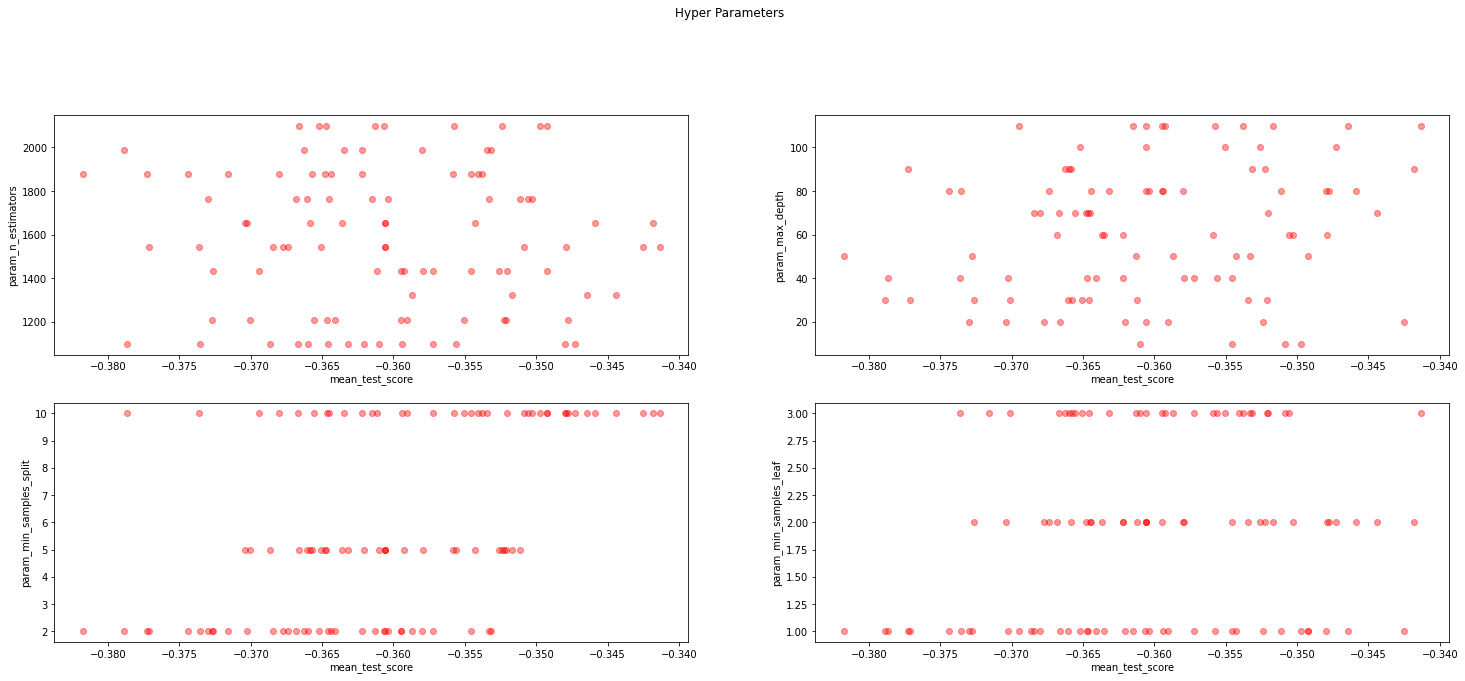

In [52]:
# Plot the hyper-parameters in relation of mean test score
# Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
# On the X axis, the closer the values are to 0 the better they are

h_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

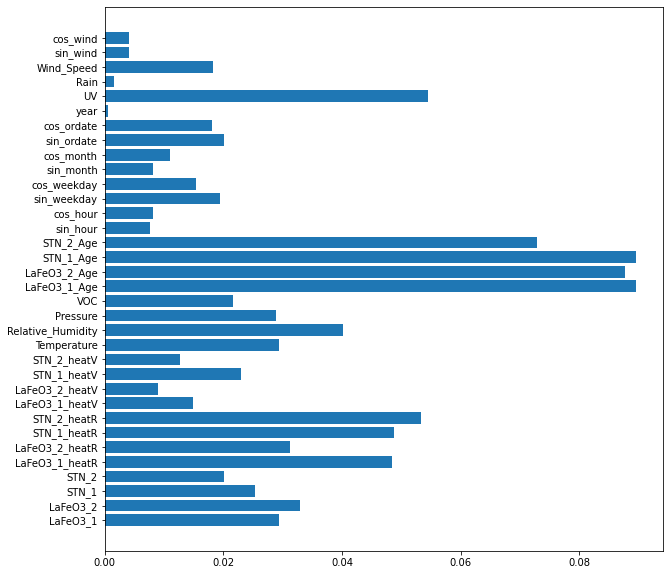

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

In [54]:
Y_test

,PM10,CO,NO2
0,16.0,0.6,8.0
1,16.0,0.6,7.0
2,16.0,0.6,8.0
3,17.0,0.5,11.0
4,18.0,0.6,15.0
...,...,...,...
2481,68.0,0.8,30.0
2482,51.0,0.6,27.0
2483,41.0,0.5,25.0
2484,37.0,0.5,24.0


In [56]:
rf_random.predict(X_test)

array([[43.14009993,  0.85507515, 55.94158648],
       [25.95845079,  0.73047997, 46.931635  ],
       [26.06311606,  0.73444064, 47.14660874],
       ...,
       [33.6701998 ,  0.66798053, 43.02508276],
       [33.58000067,  0.51856762, 31.46151256],
       [33.35794705,  0.48246818, 28.66647288]])

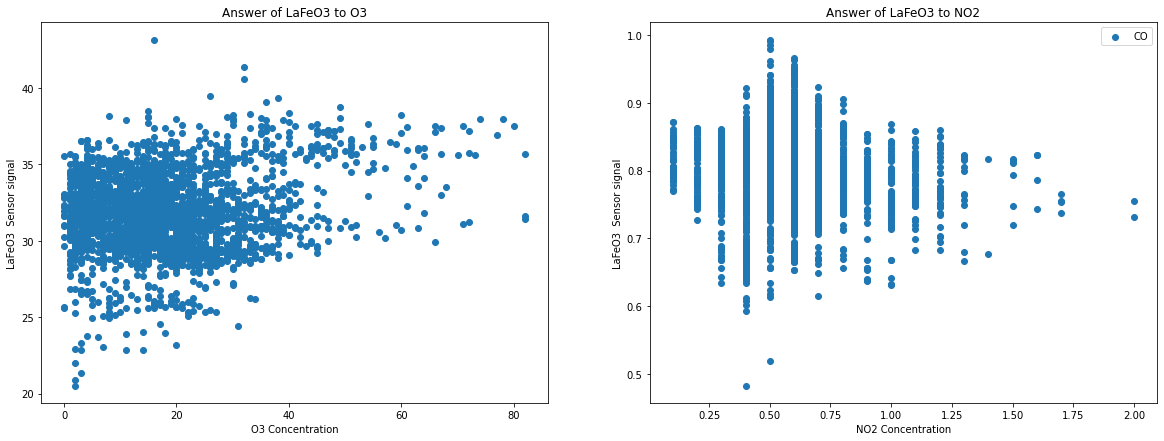

In [53]:
#This is an example of how to perform some data visualization. Take note that plotly is probably way better to do the exact same
#thing but I learned about its existance this morning so I need to make myself accustomed to it.

#For now I will just teach you the basic of to make plots with matplotlib, in general if you have question, ask me or ask google
#The second one knows more things usually 
#You are defining the "Canvas" or the space where you are drawing the plots
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
#Definition of the two plots, notice that you can add a third dimension through the use of the color of the points,
#Again plotly actually seems to do the job in a better way, you can tweak the variable to see if you can notice something
ax1.scatter(Y_test.PM10, rf_random.predict(X_test)[:, 0], label = "PM10")
ax2.scatter(Y_test.CO, rf_random.predict(X_test)[:, 1], label = "CO")
# ax1.scatter(Y_test.PM10, rf_random.predict(X_test), label = "PM10")

#Legends, title and title axes of the two graph
ax2.set_title('Answer of LaFeO3 to NO2')
ax2.set_xlabel('NO2 Concentration')
ax2.set_ylabel('LaFeO3  Sensor signal')
ax1.set_title('Answer of LaFeO3 to O3')
ax1.set_xlabel('O3 Concentration')
ax1.set_ylabel('LaFeO3  Sensor signal')
#You can in general: set a limit to each axis, add text, save the figure, use a logaritmic scale either on the X or the Y, just try and see what works or not
#ax2.set_ylim((0,0.2*10**8))
#ax2.text(0.02, 0.86, "$\mathregular{R^2}$ = " + str(round(r_squared,3)) + "  RMS  = "  + str(round(rms,3))+ " ppb", transform=ax2.transAxes, fontsize=14,verticalalignment='top', bbox=props)
ax2.legend()
#plt.savefig('PM10allRPredict.png', dpi=600, bbox_inches='tight')
plt.show()